# 케라스 CNN Fashion MNIST

#### module import

In [ ]:
%load_ext tensorboard

In [ ]:
import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets.fashion_mnist import load_data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout, Input

### 데이터 로드 및 전처리

In [ ]:
(x_train, y_train), (x_test, y_test) = load_data()

x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

x_train = x_train / 255.
x_test = x_test / 255.

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(60000,)
(10000, 28, 28, 1)
(10000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 모델 구성 및 컴파일
- 임의의 모델

In [ ]:
def build_model():
  model = Sequential()

  input = Input(shape=(28, 28, 1))
  output = Conv2D(filters=32, kernel_size=(3, 3))(input)
  output = Conv2D(filters=64, kernel_size=(3, 3))(output)
  output = Conv2D(filters=64, kernel_size=(3, 3))(output)
  output = Flatten()(output)
  output = Dense(units=128, activation='relu')(output)
  output = Dense(units=64, activation='relu')(output)
  output = Dense(units=10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  
  return model

model_1 = build_model()
model_1.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

### 모델 학습
- 런타임 GPU로 설정

In [ ]:
hist_1 = model_1.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25
329/329 [==============================] - 4s 13ms/step - loss: 0.5026 - acc: 0.8200 - val_loss: 0.3917 - val_acc: 0.8617
Epoch 2/25
329/329 [==============================] - 4s 12ms/step - loss: 0.3397 - acc: 0.8773 - val_loss: 0.3807 - val_acc: 0.8618
Epoch 3/25
329/329 [==============================] - 4s 12ms/step - loss: 0.2856 - acc: 0.8937 - val_loss: 0.3693 - val_acc: 0.8712
Epoch 4/25
329/329 [==============================] - 4s 12ms/step - loss: 0.2355 - acc: 0.9127 - val_loss: 0.3909 - val_acc: 0.8722
Epoch 5/25
329/329 [==============================] - 4s 12ms/step - loss: 0.2050 - acc: 0.9239 - val_loss: 0.3906 - val_acc: 0.8711
Epoch 6/25
329/329 [==============================] - 4s 12ms/step - loss: 0.1740 - acc: 0.9368 - val_loss: 0.4338 - val_acc: 0.8728
Epoch 7/25
329/329 [==============================] - 4s 12ms/step - loss: 0.1562 - acc: 0.9414 - val_loss: 0.4578 - val_acc: 0.8695
Epoch 8/25
329/329 [==============================] - 4s 12ms/step - 

### 학습 결과 시각화

In [ ]:
hist_1.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

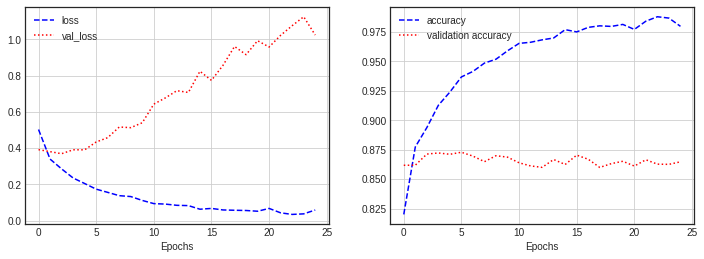

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_1.history['loss'], 'b--', label='loss')
plt.plot(hist_1.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_1.history['acc'], 'b--', label='accuracy')
plt.plot(hist_1.history['val_acc'], 'r:', label='validation accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

### 모델 평가

In [ ]:
model_1.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.1074 - acc: 0.8549


[1.107435703277588, 0.8549000024795532]

### 모델 재구성
- 학습 파라미터의 수 비교

In [ ]:
def build_model2():
  model = Sequential()

  input = Input(shape=(28, 28, 1))
  output = Conv2D(filters=32, kernel_size=(3, 3))(input)
  output = MaxPool2D(strides=(2, 2))(output)
  output = Conv2D(filters=64, kernel_size=(3, 3))(output)
  output = MaxPool2D(strides=(2, 2))(output)
  output = Conv2D(filters=64, kernel_size=(3, 3))(output)
  output = MaxPool2D(strides=(2, 2))(output)
  output = Flatten()(output)
  output = Dense(units=128, activation='relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(units=64, activation='relu')(output)
  output = Dropout(0.3)(output)
  output = Dense(units=10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  
  return model

model_2 = build_model2()
model_2.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 64)         

### 모델 재학습

In [ ]:
hist_2 = model_2.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25
329/329 [==============================] - 2s 6ms/step - loss: 0.8822 - acc: 0.6785 - val_loss: 0.5741 - val_acc: 0.7828
Epoch 2/25
329/329 [==============================] - 2s 5ms/step - loss: 0.5778 - acc: 0.7926 - val_loss: 0.4840 - val_acc: 0.8230
Epoch 3/25
329/329 [==============================] - 2s 5ms/step - loss: 0.4943 - acc: 0.8236 - val_loss: 0.4610 - val_acc: 0.8242
Epoch 4/25
329/329 [==============================] - 2s 5ms/step - loss: 0.4459 - acc: 0.8402 - val_loss: 0.4203 - val_acc: 0.8456
Epoch 5/25
329/329 [==============================] - 2s 5ms/step - loss: 0.4092 - acc: 0.8544 - val_loss: 0.3826 - val_acc: 0.8601
Epoch 6/25
329/329 [==============================] - 2s 5ms/step - loss: 0.3830 - acc: 0.8637 - val_loss: 0.3796 - val_acc: 0.8628
Epoch 7/25
329/329 [==============================] - 2s 5ms/step - loss: 0.3610 - acc: 0.8688 - val_loss: 0.3676 - val_acc: 0.8658
Epoch 8/25
329/329 [==============================] - 2s 5ms/step - loss: 0.

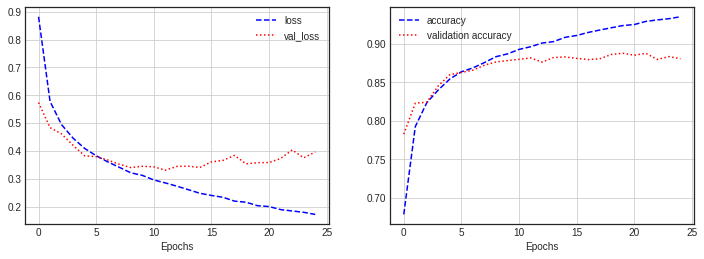

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_2.history['loss'], 'b--', label='loss')
plt.plot(hist_2.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_2.history['acc'], 'b--', label='accuracy')
plt.plot(hist_2.history['val_acc'], 'r:', label='validation accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

### 모델 재평가

In [ ]:
model_2.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4091 - acc: 0.8729


[0.40905648469924927, 0.8729000091552734]

## 모델 성능 높이기 - 많은 레이어 쌓기

In [ ]:
from tensorflow.keras.layers import BatchNormalization, ReLU

In [ ]:
def build_model3():
  model = Sequential()

  input = Input(shape=(28, 28, 1))
  output = Conv2D(filters=32, kernel_size=3, activation='relu', padding='same')(input)
  output = Conv2D(filters=64, kernel_size=3, activation='relu', padding='valid')(output)
  output = MaxPool2D(strides=(2, 2))(output)
  output = Dropout(0.5)(output)

  output = Conv2D(filters=128, kernel_size=3, activation='relu', padding='same')(output)
  output = Conv2D(filters=256, kernel_size=3, activation='relu', padding='valid')(output)
  output = MaxPool2D(strides=(2, 2))(output)
  output = Dropout(0.5)(output)

  output = Flatten()(output)
  output = Dense(units=256, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(units=100, activation='relu')(output)
  output = Dropout(0.5)(output)
  output = Dense(units=10, activation='softmax')(output)

  model = Model(inputs=[input], outputs=output)

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['acc'])
  
  return model

model_3 = build_model3()
model_3.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 11, 11, 256)      

## 모델 학습 및 결과 시각화

In [ ]:
hist_3 = model_3.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25
329/329 [==============================] - 6s 17ms/step - loss: 0.8604 - acc: 0.6876 - val_loss: 0.4329 - val_acc: 0.8412
Epoch 2/25
329/329 [==============================] - 5s 16ms/step - loss: 0.4756 - acc: 0.8322 - val_loss: 0.3435 - val_acc: 0.8707
Epoch 3/25
329/329 [==============================] - 5s 16ms/step - loss: 0.4018 - acc: 0.8599 - val_loss: 0.3080 - val_acc: 0.8889
Epoch 4/25
329/329 [==============================] - 5s 16ms/step - loss: 0.3615 - acc: 0.8715 - val_loss: 0.3182 - val_acc: 0.8761
Epoch 5/25
329/329 [==============================] - 5s 16ms/step - loss: 0.3323 - acc: 0.8837 - val_loss: 0.2566 - val_acc: 0.9056
Epoch 6/25
329/329 [==============================] - 5s 16ms/step - loss: 0.3136 - acc: 0.8908 - val_loss: 0.2594 - val_acc: 0.9057
Epoch 7/25
329/329 [==============================] - 5s 16ms/step - loss: 0.2991 - acc: 0.8947 - val_loss: 0.2384 - val_acc: 0.9154
Epoch 8/25
329/329 [==============================] - 5s 16ms/step - 

- 과적합은 되지 않았지만 층을 늘려도 좋은 성능을 낼 수 있음

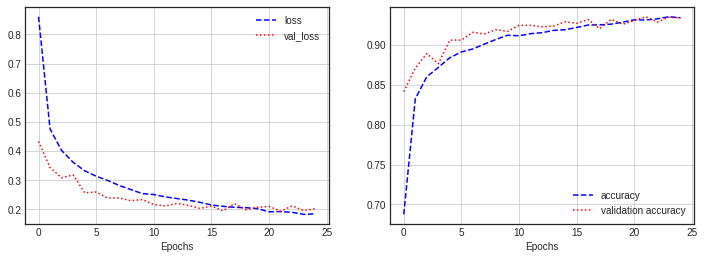

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_3.history['loss'], 'b--', label='loss')
plt.plot(hist_3.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_3.history['acc'], 'b--', label='accuracy')
plt.plot(hist_3.history['val_acc'], 'r:', label='validation accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

In [ ]:
model_3.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2189 - acc: 0.9273


[0.21894682943820953, 0.927299976348877]

## 모델 성능 높이기 - 이미지 보강(Image Augmentation)

- 주요 인자 참고: https://keras.io/ko/preprocessing/image/

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
image_generator = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.2,
    shear_range=0.6,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

In [ ]:
augment_size=200

In [ ]:
print(x_train.shape)
print(x_train[0].shape)

(60000, 28, 28, 1)
(28, 28, 1)


In [ ]:
x_augment = image_generator.flow(np.tile(x_train[0].reshape(28*28*1), augment_size).reshape(-1, 28, 28, 1),
                                 np.zeros(augment_size), batch_size=augment_size, shuffle=False).next()[0]

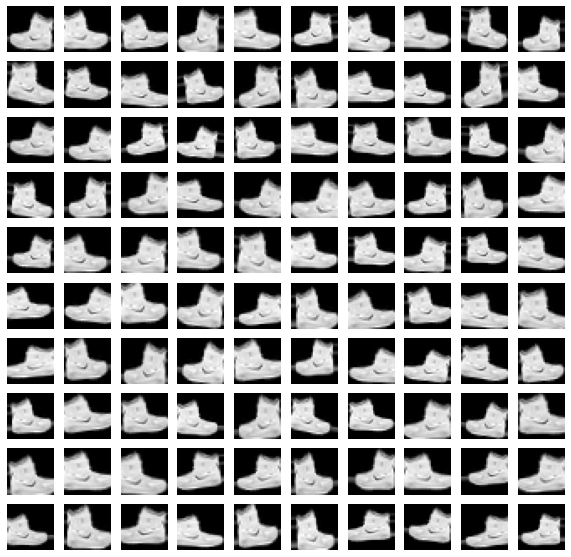

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(1, 101):
  plt.subplot(10, 10, i)
  plt.axis('off')
  plt.imshow(x_augment[i-1].reshape(28, 28), cmap='gray') 

데이터 추가

In [ ]:
image_generator = ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.1,
    shear_range=0.6,
    width_shift_range=0.15,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)

In [ ]:
augment_size=30000

In [ ]:
random_mask = np.random.randint(x_train.shape[0], size=augment_size)
x_augmented = x_train[random_mask].copy()
y_augmented = y_train[random_mask].copy()

In [ ]:
x_augmented = image_generator.flow(x_augmented, np.zeros(augment_size),
                                   batch_size=augment_size, shuffle=False).next()[0]

x_train = np.concatenate((x_train, x_augmented))
y_train = np.concatenate((y_train, y_augmented))

print(x_train.shape)
print(y_train.shape)

(120000, 28, 28, 1)
(120000,)




## 모델 학습 및 결과 시각화

In [ ]:
model_4 = build_model3()
model_4.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 26, 26, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 256)      

In [ ]:
hist_4 = model_4.fit(x_train, y_train,
                     epochs=25,
                     validation_split=0.3,
                     batch_size=128)

Epoch 1/25
657/657 [==============================] - 11s 16ms/step - loss: 0.8090 - acc: 0.7013 - val_loss: 0.8567 - val_acc: 0.6807
Epoch 2/25
657/657 [==============================] - 11s 16ms/step - loss: 0.5027 - acc: 0.8218 - val_loss: 0.7575 - val_acc: 0.7248
Epoch 3/25
657/657 [==============================] - 11s 16ms/step - loss: 0.4293 - acc: 0.8482 - val_loss: 0.6486 - val_acc: 0.7689
Epoch 4/25
657/657 [==============================] - 11s 16ms/step - loss: 0.3861 - acc: 0.8636 - val_loss: 0.6484 - val_acc: 0.7616
Epoch 5/25
657/657 [==============================] - 11s 16ms/step - loss: 0.3625 - acc: 0.8722 - val_loss: 0.5990 - val_acc: 0.7858
Epoch 6/25
657/657 [==============================] - 11s 16ms/step - loss: 0.3433 - acc: 0.8793 - val_loss: 0.5664 - val_acc: 0.7954
Epoch 7/25
657/657 [==============================] - 11s 16ms/step - loss: 0.3231 - acc: 0.8875 - val_loss: 0.5793 - val_acc: 0.7901
Epoch 8/25
657/657 [==============================] - 11s 16ms

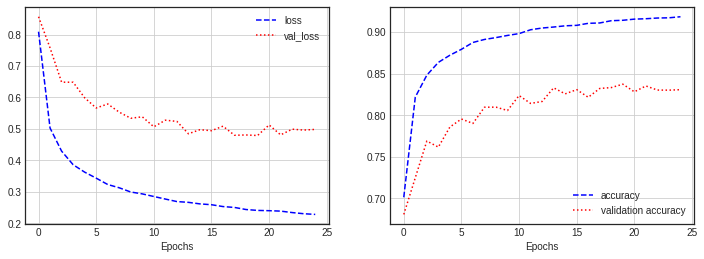

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(hist_4.history['loss'], 'b--', label='loss')
plt.plot(hist_4.history['val_loss'], 'r:', label='val_loss')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist_4.history['acc'], 'b--', label='accuracy')
plt.plot(hist_4.history['val_acc'], 'r:', label='validation accuracy')
plt.xlabel('Epochs')
plt.grid()
plt.legend()

plt.show()

- 학습 인자를 이전과 다르게 주면서 학습하면 더 잘 나올것으로 판단

In [ ]:
model_4.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1999 - acc: 0.9285


[0.19992893934249878, 0.9284999966621399]